## Statistics 504 Homework #2 <br>
DRAFT 1.0 <br>
Fall 2015 <br>
Erich Seamon <br>
University of Idaho <br>
erichs@uidaho.edu <br>
http://github.com/erichseamon.com/stat504-python <br>

This assignment uses a small subset of the data from Kaggle's Yelp Business Rating Prediction competition. The data set is at https://github.com/justmarkham/DAT7/tree/master/data/yelp.csv
Description of the data: Each observation in this dataset is a review of a particular business by a particular user. The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) The "cool" column is the number of "cool" votes this particular review received from other Yelp users. There is no limit to how many "cool" votes a review can receive. The "useful" and "funny" columns are similar to the "cool" column.


#### TASK 1: read yelp.csv into a DataFrame

In [108]:
import matplotlib
%matplotlib nbagg

import pandas as pd
import numpy as np
import random
#random.seed(1234567) #setting the random seed for reproducible results consistent across our class - fall 2015
yelp = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT7/master/data/yelp.csv')

#### TASK 2: create a new DataFrame that only contains the 5-star and 1-star reviews

In [109]:
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

#### TASK 3: Use a random seed 1234567, split the new DataFrame into training and testing sets

In [110]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(yelp_best_worst.text, yelp_best_worst.stars, random_state=1234567)

#### TASK 4: use CountVectorizer to create document-term matrices from X_train and X_test

In [121]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
train_dtm = vect.fit_transform(X_train)
test_dtm = vect.transform(X_test)

In [123]:
train_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [80]:
vect2 = CountVectorizer()
X = vect2.fit_transform(yelp_best_worst.text)
y = yelp_best_worst.stars

#### TASK 5a: use Logistic Regression to predict the star rating for the testing set, and calculate accuracy

In [ ]:
from sklearn import linear_model, datasets
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(train_dtm, y_train)
y_pred_class = logreg.predict(test_dtm)
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

#### TASK 5b: use K-Nearest Neighbors to predict the star rating for the testing set, and calculate accuracy

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(train_dtm, y_train)
y_pred_class = neigh.predict(test_dtm)
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

#### Task 5b: Calculate TRAINING ERROR and TESTING ERROR for K=1 through 50

In [89]:
# calculate TRAINING ERROR and TESTING ERROR for K=1 through 50
k_range = range(1, 50)
training_error = []
testing_error = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # training error
    knn.fit(X, y)
    y_pred = knn.predict(X)
    training_error.append(1 - metrics.accuracy_score(y, y_pred))
    # testing error
    knn.fit(train_dtm, y_train)
    y_pred = knn.predict(test_dtm)
    testing_error.append(1 - metrics.accuracy_score(y_test, y_pred))

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

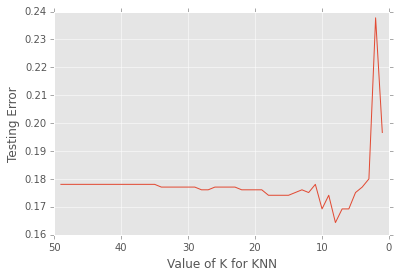

In [91]:
# plot the relationship between K (HIGH TO LOW) and TESTING ERROR
plt.plot(k_range, testing_error)
plt.gca().invert_xaxis()
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Error')

In [92]:
df = pd.DataFrame({'K': k_range, 'train':training_error, 'test':testing_error}).set_index('K').sort_index(ascending=False)

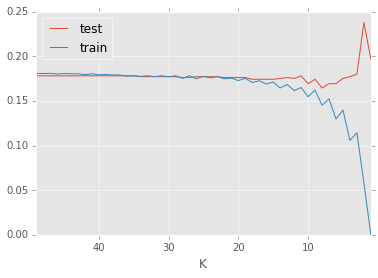

In [93]:
df.plot()

In [95]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 5

h = .1  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(train_dtm, y_train)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

Automatically created module for IPython interactive environment


ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 2 while Y.shape[1] == 16726

In [107]:
Y.shape[1]

NameError: name 'Y' is not defined

In [22]:
    h = 1  # step size in the mesh

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = train_dtm[:, 0].min() - 1, train_dtm[:, 0].max() + 1
    y_min, y_max = train_dtm[:, 1].min() - 1, train_dtm[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(train_dtm[:, 0], train_dtm[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 2 while Y.shape[1] == 16825

#### TASK 5c: use Classification Tree to predict the star rating for the testing set, and calculate accuracy

In [7]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(train_dtm, y_train)
y_pred_class = clf.predict(test_dtm)
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.85518590998


In [9]:
from sklearn.externals.six import StringIO  
import pydot 
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data)
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 

In [15]:
graph.write_jpeg("yelp_tree_plot.jpg")

True

In [16]:
from IPython.display import Image
Image(filename='yelp_tree_plot.jpg')

In [15]:
# TASK 6: calculate the AUC
y_pred_prob = logreg.predict_proba(test_dtm)[:, 1]
import numpy as np
y_test_binary = np.where(y_test==5, 1, 0)
print metrics.roc_auc_score(y_test_binary, y_pred_prob)

0.958314957974


<IPython.core.display.Javascript object>


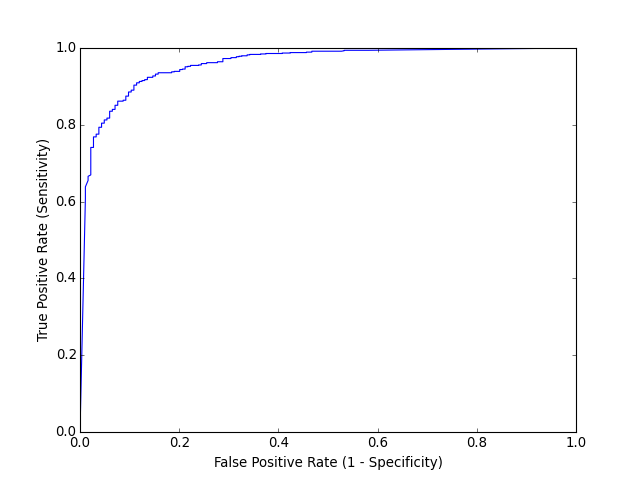

In [16]:
# TASK 7: plot the ROC curve
import matplotlib
%matplotlib nbagg

import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_test_binary, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [17]:
# TASK 8: print the confusion matrix, and calculate sensitivity and specificity
print metrics.confusion_matrix(y_test, y_pred_class)
813 / float(25 + 813)   # sensitivity
126 / float(126 + 58)   # specificity

[[145  39]
 [ 45 793]]


0.6847826086956522

In [18]:
# TASK 9: browse the review text for the false positive and false negatives
X_test[y_test < y_pred_class]   # false positives
X_test[y_test > y_pred_class]   # false negatives

6068    This review pertains to carnitas, and as such ...
5043    It was a very lovely place. I had read the rev...
2164    I violated my rule of avoiding grocery shoppin...
7148    I now consider myself an Arizonian. If you dri...
6120    I took a cooking class with Chef Eddie Matney ...
988     OK, so this is how much I love this product. I...
1879    Totally worth the drive from Scottsdale. The f...
6509    Hiking Camelback Mountain has to have been the...
4899    I'm sorry to say that they closed their doors ...
7182    My boss took us here for a little Holiday lunc...
2784    Addicted to duck fat fries!  Curry mayo is a p...
6930    I moved to AZ about five months ago and have h...
6318    Since I have ranted recently on poor customer ...
3831    Went back, they appeared to have remodeled and...
5657    This review is based on an event I attended he...
2504    I've passed by prestige nails in walmart 100s ...
5939    With our regular Indian place converted to buf...
2129    i miss

In [19]:
# TASK 10: change the threshold to balance sensitivity and specificity
y_pred_class = np.where(y_pred_prob > 0.999, 5, 1)
print metrics.confusion_matrix(y_test, y_pred_class)
723 / float(115 + 723)  # sensitivity
162 / float(162 + 22)   # specificity

[[171  13]
 [127 711]]


0.8804347826086957

In [22]:
# TASK 11 (BONUS): 5-class classification on the original DataFrame
X_train, X_test, y_train, y_test = train_test_split(yelp.text, yelp.stars, random_state=1)
train_dtm = vect.fit_transform(X_train)
test_dtm = vect.transform(X_test)
logreg.fit(train_dtm, y_train)
y_pred_class = logreg.predict(test_dtm)
print metrics.accuracy_score(y_test, y_pred_class)
print metrics.confusion_matrix(y_test, y_pred_class)

0.4588
[[ 71  37  24  24  29]
 [ 31  72  62  33  36]
 [ 17  44 104 138  62]
 [ 15  34  92 427 316]
 [ 22  14  29 294 473]]


In [24]:
yelp

business_id        date               review_id  stars  \
0     9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1     ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2     6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3     _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4     6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   
5     -yxfBYGB6SEqszmxJxd97A  2007-12-13  m2CKSsepBCoRYWxiRUsxAg      4   
6     zp713qNhx8d9KCJJnrw1xA  2010-02-12  riFQ3vxNpP4rWLk_CSri2A      5   
7     hW0Ne_HTHEAgGF1rAdmR-g  2012-07-12  JL7GXJ9u4YMx7Rzs05NfiQ      4   
8     wNUea3IXZWD63bbOQaOH-g  2012-08-17  XtnfnYmnJYi71yIuGsXIUA      4   
9     nMHhuYan8e3cONo3PornJA  2010-08-11  jJAIXA46pU1swYyRCdfXtQ      5   
10    AsSCv0q_BWqIe3mX2JqsOQ  2010-06-16  E11jzpKz9Kw5K7fuARWfRw      5   
11    e9nN4XxjdHj4qtKCOPq_vg  2011-10-21  3rPt0LxF7rgmEUrznoH22w      5   
12    h53YuCiIDfEFSJCQpk8v1g  2010-01-11  cGnKNX3I9rthE0-TH24-qA      5   
13    WGNIYMeXPyoWav1APUq7jA  2011-12-23  FvEEw1_OsrYdvwLV5Hrliw      4   
14    yc5AH9H71xJidA_J2mChLA  2010-05-20  pfUwBKYYmUXeiwrhDluQcw      4   
15    Vb9FPCEL6Ly24PNxLBaAFw  2011-03-20  HvqmdqWcerVWO3Gs6zbrOw      2   
16    supigcPNO9IKo6olaTNV-g  2008-10-12  HXP_0Ul-FCmA4f-k9CqvaQ      3   
17    O510Re68mOy9dU490JTKCg  2010-05-03  j4SIzrIy0WrmW4yr4--Khg      5   
18    b5cEoKR8iQliq-yT2_O0LQ  2009-03-06  v0cTd3PNpYCkTyGKSpOfGA      3   
19    4JzzbSbK9wmlOBJZWYfuCg  2011-11-17  a0lCu-j2Sk_kHQsZi_eNgw      4   
20    8FNO4D3eozpIjj0k3q5Zbg  2008-10-08  MuqugTuR5DdIPcZ2IVP3aQ      3   
21    tdcjXyFLMKAsvRhURNOkCg  2011-06-28  LmuKVFh03Uz318VKnUWrxA      5   
22    eFA9dqXT5EA_TrMgbo03QQ  2011-07-13  CQYc8hgKxV4enApDkx0IhA      5   
23    IJ0o6b8bJFAbG6MjGfBebQ  2010-09-05  Dx9sfFU6Zn0GYOckijom-g      1   
24    JhupPnWfNlMJivnWB5druA  2011-05-22  cFtQnKzn2VDpBedy_TxlvA      5   
25    wzP2yNpV5p04nh0injjymA  2010-05-26  ChBeixVZerfFkeO0McdlbA      4   
26    qjmCVYkwP-HDa35jwYucbQ  2013-01-03  kZ4TzrVX6qeF0OvrVTGVEw      5   
27    wct7rZKyZqZftzmAU-vhWQ  2008-03-21  B5h25WK28rJjx4KHm4gr7g      4   
28    vz2zQQSjy-NnnKLZzjjoxA  2011-03-30  Y_ERKao0J5WsRiCtlKSNSA      4   
29    i213sY5rhkfCO8cD-FPr1A  2012-07-12  hre97jjSwon4bn1muHKOJg      4   
...                      ...         ...                     ...    ...   
9970  R6aazv8FB-6BeanY3ag8kw  2009-09-26  gP17ykqduf3AlewSaRb61w      5   
9971  JOZqBKIOB8WEBAWm7v1JFA  2008-07-22  QI9rfeWrZnvK5ojz8cEoRg      5   
9972  OllL0G9Kh_k1lx-2vrFDXQ  2012-10-23  U23UfuxN9DpAU0Dslc5KjQ      4   
9973  XHr5mXFgobOHoxbPJxmYdg  2009-09-28  udMiWjeG0OGcb4nNddDkBg      5   
9974  cdacUBBL2tDbDnB1EfhpQw  2009-12-16  bVU-_x9ijxjEImNluy84OA      2   
9975  EWMwV5V9BxNs_U6nNVMeqw  2007-10-20  g4LsVAoafmUDHiS-_yN4tA      5   
9976  iDYzGVIF1TDWdjHNgNjCVw  2009-09-11  bKjMcpNj0xSu2UI2EFQn1g      3   
9977  iDYzGVIF1TDWdjHNgNjCVw  2012-10-30  qaNZyCUJA6Yp0mvPBCknPQ      5   
9978  9Y3aQAVITkEJYe5vLZr13w  2010-04-01  ZoTUU6EJ1OBNr7mhqxHBLw      5   
9979  GV1P1x9eRb4iZHCxj5_IjA  2012-12-07  eVUs1C4yaVJNrc7SGTAheg      5   
9980  GHYOl_cnERMOhkCK_mGAlA  2011-07-03  Q-y3jSqccdytKxAyo1J0Xg      5   
9981  AX8lx9wHNYT45lyd7pxaYw  2008-11-27  IyunTh7jnG7v3EYwfF3hPw      5   
9982  KV-yJLmlODfUG1Mkds6kYw  2012-02-25  rIgZgxJPWTacq3mV6DfWfg      4   
9983  24V8QQWO6VaVggHdxjQQ_A  2010-06-06  PqiIeFOiVr-tj_FtHGAH2g      3   
9984  wepFVY82q_tuDzG6lQjHWw  2012-02-12  spusZYROtBKw_5tv3gYm4Q      1   
9985  EMGkbiCMfMTflQux-_JY7Q  2012-10-17  wB-f0xfx7WIyrOsRJMkDOg      4   
9986  oCA2OZcd_Jo_ggVmUx3WVw  2012-03-31  ijPZPKKWDqdWOIqYkUsJJw      4   
9987  r-a-Cn9hxdEnYTtVTB5bMQ  2012-04-07  j9HwZZoBBmJgOlqDSuJcxg      1   
9988  xY1sPHTA2RGVFlh5tZhs9g  2012-06-02  TM8hdYqs5Zi1jO5Yrq6E0g      4   
9989  mQUC-ATrFuMQSaDQb93Pug  2011-10-01  ta2P9joJqeFB8BzFp-AzjA      5   
9990  R8VwdLyvsp9iybNqRvm94g  2011-10-03  pcEeHdAJPoFNF23es0kKWg      5   
9991  WJ5mq4EiWYAA4Vif0xDfdg  2011-12-05  

In [25]:
yelp_best_worst

business_id        date               review_id  stars  \
0     9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1     ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
3     _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4     6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   
6     zp713qNhx8d9KCJJnrw1xA  2010-02-12  riFQ3vxNpP4rWLk_CSri2A      5   
9     nMHhuYan8e3cONo3PornJA  2010-08-11  jJAIXA46pU1swYyRCdfXtQ      5   
10    AsSCv0q_BWqIe3mX2JqsOQ  2010-06-16  E11jzpKz9Kw5K7fuARWfRw      5   
11    e9nN4XxjdHj4qtKCOPq_vg  2011-10-21  3rPt0LxF7rgmEUrznoH22w      5   
12    h53YuCiIDfEFSJCQpk8v1g  2010-01-11  cGnKNX3I9rthE0-TH24-qA      5   
17    O510Re68mOy9dU490JTKCg  2010-05-03  j4SIzrIy0WrmW4yr4--Khg      5   
21    tdcjXyFLMKAsvRhURNOkCg  2011-06-28  LmuKVFh03Uz318VKnUWrxA      5   
22    eFA9dqXT5EA_TrMgbo03QQ  2011-07-13  CQYc8hgKxV4enApDkx0IhA      5   
23    IJ0o6b8bJFAbG6MjGfBebQ  2010-09-05  Dx9sfFU6Zn0GYOckijom-g      1   
24    JhupPnWfNlMJivnWB5druA  2011-05-22  cFtQnKzn2VDpBedy_TxlvA      5   
26    qjmCVYkwP-HDa35jwYucbQ  2013-01-03  kZ4TzrVX6qeF0OvrVTGVEw      5   
30    V1nEpIRmEa1768oj_tuxeQ  2011-05-09  dtpJXC5p_sdWDLSobluJ3Q      5   
31    vvA3fbps4F9nGlAEYKk_sA  2012-05-04  S9OVpXat8k5YwWCn6FAgXg      1   
32    rxQ2PIjhAx6dgAqUalf99Q  2012-09-09  -v-shjbxoj7hpU62yn6vag      5   
35    o1GIYYZJjM6nM03fQs_uEQ  2011-11-30  ApKbwpYJdnhhgP4NbjQw2Q      1   
46    aRkYtXfmEKYG-eTDf_qUsw  2009-04-04  Ckk1Cne1GHwzmJfo7M4r2w      5   
51    zp713qNhx8d9KCJJnrw1xA  2010-02-01  Bmt1QRDT0GfyXkhOvj_BfQ      5   
54    K8pM6qQdYu5h6buRE1-_sw  2009-08-06  GOconNmWgg6cJbgwSwrozw      5   
59    E6DnUFy3GoN4DxTqturtug  2010-09-28  nzSOTOZiAb1ITqbRgWKnnQ      5   
61    l4vBbCL9QbGiwLuLKwD_bA  2011-11-22  DJVxOfj2Rw9zklC9tU3i1w      1   
64    CEswyP-9SsXRNLR9fFGKKw  2012-05-19  GXj4PNAi095-q9ynPYH3kg      1   
65    6Ry-gjGqApTSRZkfdYlLmw  2011-05-04  LN4l4wklQB0IVBjm-vq9TA      1   
66    taSsiZAGZSz2gRg7_M4XDw  2011-12-30  L_q9kLaGo33j2Ij8yUIGDw      5   
67    3oLy0rlzRI_xiqfQHqC4_g  2011-04-28  dY_p1YkjZxJmREb9Lfc5vw      5   
69    N5iW2JG5e-QyUh7brRNSfw  2012-01-05  -_hed9F2kUDdb4oa1CXKIA      5   
71    NNGJQF3WeIHzGzweCpZ-VA  2011-04-23  jNewOjPp56NMDrKlajrgFQ      1   
...                      ...         ...                     ...    ...   
9941  W8WyVVxinyRjzP8gJa7ILg  2009-01-20  lgrfMIvhkCzclg5KEharjw      5   
9942  iV7D7fHKb-bF9fCL_bEMtA  2009-04-22  WjkBCWy7pu4U2-3PbvM0bg      5   
9943  OY76JYsWn1rhb6Te2BE5Rw  2011-08-19  9IhdGx6Z4OUYXW9oPrPuXQ      5   
9945  hfl62LX14YqNpG0g0Tj6_Q  2012-02-27  2hvg6T-sCh7upAe17Jxs3w      5   
9947  VsrvWdZL2993olnW3z8R3A  2011-08-20  GW5D1Dv1Uc8X0_-yf0pzPA      5   
9951  EGiGWZp_zSqdeftiFQ7MbA  2011-06-13  OvsDIpdK5T4G81NUzWAkTA      5   
9953  QCxXYA13PtkD3wec47_r8Q  2012-03-14  V2N2TCqnaqMYfg7zXGG-Rg      1   
9956  7tPe20uDErh-iSkfNEWzVQ  2011-01-26  b0NnnjzhDmI7feVNzniZ3w      5   
9957  62F17L8z4Q4S7U_TayuDBA  2010-03-13  oTm0bBYcbgoMPJloZUpUwQ      5   
9959  uEJQSIjWui-TDWXaGlcqyQ  2010-09-01  -2oWwvRjNEHNDa4TWVlbAA      5   
9965  L9UYbtAUOcfTgZFimehlXw  2009-07-31  F9KzEFjAtbWr3h8toNtDgw      5   
9966  ttpZx2t4fMAApdU9MFG91w  2012-07-20  rR322HOBSV2JSY6omtNoPw      5   
9969  qhIlkXgcC4j34lNTIqu9WA  2011-03-16  qu7tpZFxaPSxiuIgFiiYlQ      5   
9970  R6aazv8FB-6BeanY3ag8kw  2009-09-26  gP17ykqduf3AlewSaRb61w      5   
9971  JOZqBKIOB8WEBAWm7v1JFA  2008-07-22  QI9rfeWrZnvK5ojz8cEoRg      5   
9973  XHr5mXFgobOHoxbPJxmYdg  2009-09-28  udMiWjeG0OGcb4nNddDkBg      5   
9975  EWMwV5V9BxNs_U6nNVMeqw  2007-10-20  g4LsVAoafmUDHiS-_yN4tA      5   
9977  iDYzGVIF1TDWdjHNgNjCVw  2012-10-30  qaNZyCUJA6Yp0mvPBCknPQ      5   
9978  9Y3aQAVITkEJYe5vLZr13w  2010-04-01  ZoTUU6EJ1OBNr7mhqxHBLw      5   
9979  GV1P1x9eRb4iZHCxj5_IjA  2012-12-07  eVUs1C4yaVJNrc7SGTAheg      5   
9980  GHYOl_cnERMOhkCK_mGAlA  2011-07-03  Q-y3jSqccdytKxAyo1J0Xg      5   
9981  AX8lx9wHNYT45lyd7pxaYw  2008-11-27  